In [1]:
import numpy as np
import matplotlib.pyplot as plt
import math

In [7]:
fs = 96000
#
fft_number = 1024
overlab = 0.5
window_type = 'hann'
#
hop_size = math.ceil(fft_number*(1-overlab))
half_size = math.ceil((fft_number+1)/2)
#
start_fre = 3000
end_fre = 10000

threshold = 2
frequency_width = 300

df = fs/fft_number
dt = hop_size/fs

f = np.arange(half_size)*fs/fft_number

start_index = math.floor((start_fre)/df)
end_index = math.ceil((end_fre)/df)
width_size = math.ceil(frequency_width/2/df)

In [8]:
with open("detection.npy","rb") as file:
    detection = np.load(file)

In [6]:
detection.shape

(75, 3749)

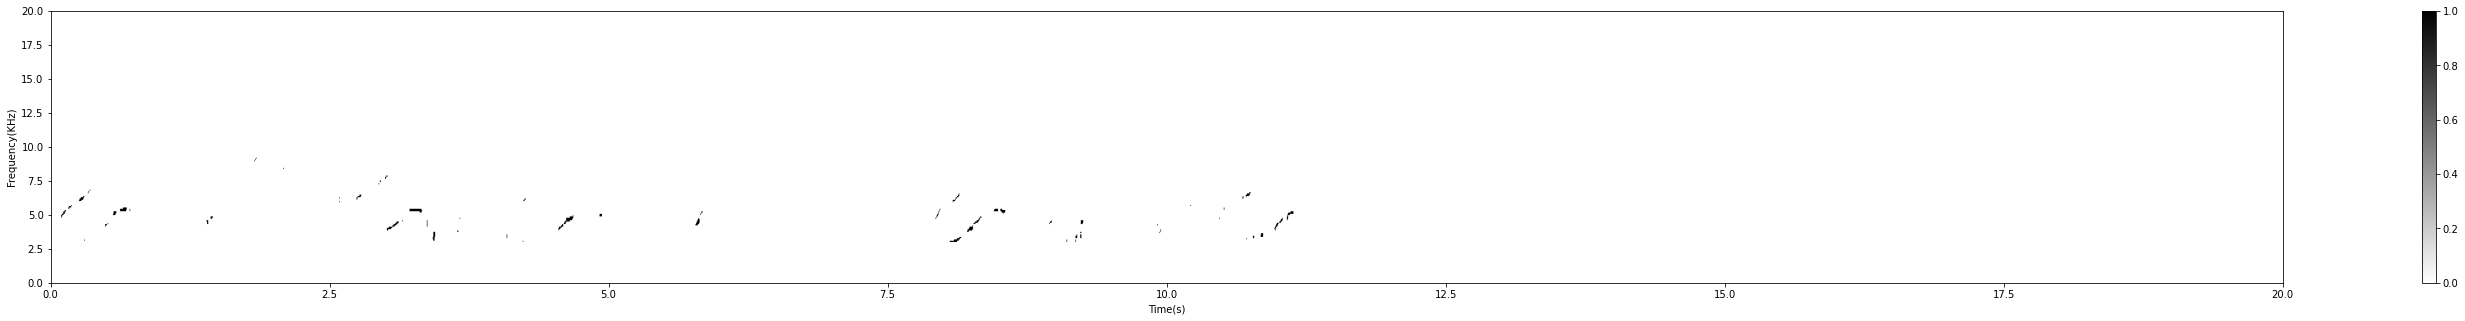

In [22]:
fig, ax = plt.subplots(figsize=(50,5))
im = ax.imshow(detection, cmap='binary',  origin='lower', aspect='auto',
               interpolation='hanning', extent=(0, 20, f[start_index]/1000, f[end_index]/1000))
ax.set_ylim([0,20])
ax.set_xlabel("Time(s)")
ax.set_ylabel("Frequency(KHz)")
c_bar = fig.colorbar(im)
plt.show()

In [15]:
import matplotlib.pyplot as plt
from sklearn.cluster import DBSCAN

In [16]:
(x,y) = np.nonzero(detection.T)
c = np.array([x,y]).T

In [17]:
clustering=DBSCAN(eps=20,min_samples=10).fit(c)

In [47]:
point = c[clustering.labels_!=-1]
new_label = clustering.labels_[clustering.labels_!=-1]

In [42]:
point_x = point.T[0]*dt
point_y = point.T[1]*df/1000+3

In [53]:
import pandas as pd
df = pd.DataFrame(columns = ['Start Freq','End Freq', 'Start Time', 'End Time', 'Duration'])

,Start Freq,End Freq,Start Time,End Time,Duration


In [96]:
length = len(set(new_label))
col = ['Start Time','End Time','Start Freq','End Freq','Duration']
feature = []
for i in range(0,10):
    cluster_x = point_x[new_label==i]
    cluster_y = point_y[new_label==i]
    feature.append([cluster_x[0], cluster_x[-1], cluster_y[0], cluster_y[-1], cluster_x[-1]-cluster_x[0]])
df = pd.DataFrame(feature, columns=col)

In [97]:
df.to_csv('whislte_detection_outcome.csv', mode='w', header=True,index=False)

In [94]:
feature_2 = []
for i in range(10, length):
    cluster_x = point_x[new_label==i]
    cluster_y = point_y[new_label==i]
    feature_2.append([cluster_x[0], cluster_x[-1], cluster_y[0], cluster_y[-1], cluster_x[-1]-cluster_x[0]])
df = pd.DataFrame(feature_2, columns=col)
if os.path.isfile('whislte_detection_outcome.csv'):
    df.to_csv('whislte_detection_outcome.csv', mode='a', header=False,index=False)

In [91]:
import os.path

if os.path.isfile('whislte_detection_outcome.csv'):
    print ("File exist")
else:
    print ("File not exist")

File exist


In [95]:
df_2 = pd.read_csv('whislte_detection_outcome.csv')
df_2

,Start Time,End Time,Start Freq,End Freq,Duration
0,0.090667,0.346667,4.78125,6.75000,0.256000
1,0.485333,0.704000,4.12500,5.34375,0.218667
2,1.392000,1.445333,4.50000,4.78125,0.053333
3,2.736000,2.773333,6.09375,6.37500,0.037333
4,3.008000,3.434667,3.84375,3.65625,0.426667
5,4.544000,4.672000,3.84375,4.87500,0.128000
6,5.770667,5.829333,4.21875,5.15625,0.058667
7,7.920000,7.957333,4.68750,5.34375,0.037333
8,8.048000,8.325333,3.00000,4.78125,0.277333
9,8.074667,8.128000,5.90625,6.46875,0.053333


In [43]:
point_x

array([ 0.09066667,  0.09066667,  0.096     ,  0.096     ,  0.10133333,
        0.10666667,  0.10666667,  0.112     ,  0.112     ,  0.11733333,
        0.11733333,  0.12266667,  0.12266667,  0.128     ,  0.15466667,
        0.16      ,  0.16      ,  0.16533333,  0.17066667,  0.176     ,
        0.18133333,  0.25066667,  0.256     ,  0.256     ,  0.26133333,
        0.26133333,  0.26666667,  0.26666667,  0.26666667,  0.272     ,
        0.272     ,  0.27733333,  0.27733333,  0.28266667,  0.28266667,
        0.288     ,  0.288     ,  0.29333333,  0.33066667,  0.336     ,
        0.34666667,  0.48533333,  0.48533333,  0.49066667,  0.496     ,
        0.50666667,  0.55466667,  0.56      ,  0.56      ,  0.56      ,
        0.56533333,  0.56533333,  0.56533333,  0.57066667,  0.57066667,
        0.57066667,  0.576     ,  0.576     ,  0.58133333,  0.61866667,
        0.61866667,  0.624     ,  0.624     ,  0.62933333,  0.62933333,
        0.63466667,  0.63466667,  0.64      ,  0.64      ,  0.64

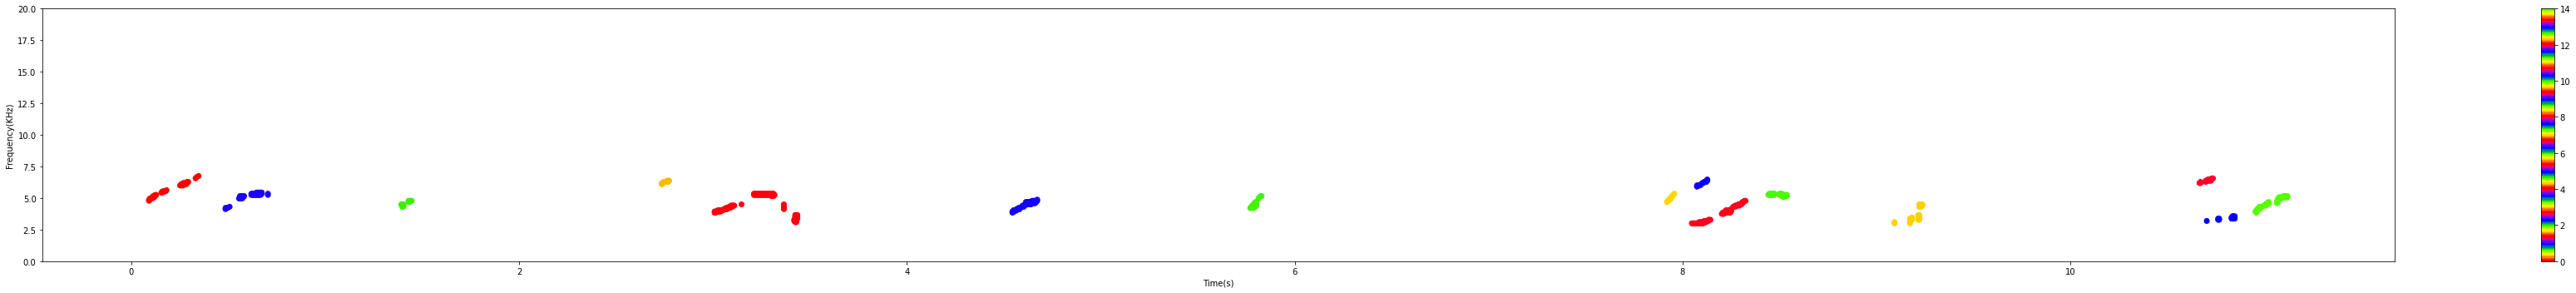

In [41]:
fig, ax = plt.subplots(figsize=(50,5))
im = ax.scatter(point_x,point_y, c=clustering.labels_[clustering.labels_!=-1], cmap="prism")

ax.set_ylim([0,20])
ax.set_xlabel("Time(s)")
ax.set_ylabel("Frequency(KHz)")
c_bar = fig.colorbar(im)
plt.tight_layout()

In [131]:
cc = c[clustering.labels_!=-1]

In [139]:
cc[30:60]

array([[ 51,  34],
       [ 52,  33],
       [ 52,  34],
       [ 53,  33],
       [ 53,  34],
       [ 54,  34],
       [ 54,  35],
       [ 55,  35],
       [ 62,  38],
       [ 63,  39],
       [ 65,  40],
       [ 91,  12],
       [ 91,  13],
       [ 92,  13],
       [ 93,  13],
       [ 95,  14],
       [104,  21],
       [105,  21],
       [105,  22],
       [105,  23],
       [106,  21],
       [106,  22],
       [106,  23],
       [107,  21],
       [107,  22],
       [107,  23],
       [108,  22],
       [108,  23],
       [109,  23],
       [116,  24]], dtype=int64)

In [140]:
clustering.labels_[clustering.labels_!=-1][30:60]

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1], dtype=int64)